# Project 4 - Creditworthiness Prediction

## Introduction

### Description of Data Values

* Status of existing checking account
	* A11: ... < 0 EUR
	*  A12: 0 ≤ ... < 200 EUR
	*  A13: ... ≥ 200 EUR / salary assignments for at least 1 year
	* A14: no checking account
* Duration in month
* Credit history
	* A30: no credits taken/ all credits paid back duly
	* A31: all credits at this bank paid back duly
	* A32: existing credits paid back duly till now
	* A33: delay in paying off in the past
	* A34: critical account/ other credits existing (not at this bank)
* Purpose (incomplete)
	* A40: car (new)
	* A41: car (used)
	* A42: furniture/equipment
	* A43: radio/television
	* A44: domestic appliances
	* A45: repairs
	* A46: education
	* A47: (vacation - does not exist?)
	*  A48: retraining
	* A49: business
	*  A410: others
* Credit amount
* Savings account/bonds
	* A61: ... < 100 EUR
	*  A62: 100 ≤ ... < 500 EUR
	* A63: 500 ≤ ... < 1000 EUR
	*  A64: .. ≥ 1000 EUR
	* A65: unknown/ no savings account
* Present employment since (incomplete)
	* A71: unemployed
	* A72: ... < 1 year
	*  A73: 1 ≤ ... < 4 years
	*  A74: 4 ≤ ... < 7 years
	*  A75: .. ≥ 7 years
* Instalment rate in percentage of disposable income
* Personal status and sex
	* A91: male: divorced/separated
	* A92: female: divorced/separated/married
	*  A93: male: single
	*  A94: male: married/widowed
	* A95: female: single
* Other debtors / guarantors
	* A101: none
	*  A102: co-applicant
	*  A103: guarantor
* Present residence since
* Property
	* A121: real estate
	* A122: if not A121: building society savings agreement/ life insurance
	* A123: if not A121/A122: car or other, not in attribute  6
	*  A124: unknown / no property
* Age in years
* Other installment plans
	* A141: bank
	*  A142: stores
	*  A143: none
* Housing
	*  A151: rent
	*  A152: own
	*  A153: for free
* Number of existing credits at this bank
* Job (incomplete)
	* A171: unemployed/ unskilled - non-resident
	*  A172: unskilled - resident
	*  A173: skilled employee / official
	*  A174: management/ self-employed/
	*  A175: highly qualified employee/ officer
* Number of people being liable to provide maintenance for
* Telephone
	*  A191: none
	*  A192: yes, registered under the customers name
* Foreign worker (incomplete)
	* A201: yes
	* A202: no
* Creditworthy
	* 1: yes
	* 2: no

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Importing the data

In [3]:
cols = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose (incomplete)', 
        'Credit amount', 'Savings account/bonds', 'Present employment since (incomplete)', 'Instalment rate in % of disposable income',
       'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property', 'Age', 'Other installment plans', 
       'Housing', 'Number of existing credits at this bank', 'Job (incomplete)', 'Number of people being liable to provide maintenance for',
       'Telephone', 'Foreign worker (incomplete)', 'Creditworthy']

In [4]:
df = pd.read_csv('kredit.dat', sep='\t', header=None, names=cols, na_values="?" )

### Data Description and Exploration

In [5]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [6]:
df.shape

(1000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose (incomplete)                                      827 non-null    object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since (incomplete)                     504 non-null    object
 7   Instalment rate in % of disposable income                 1000 non-null   int64 
 8   Personal status and sex      

In [8]:
# Get the data statistics

df.describe()

,Duration in month,Credit amount,Instalment rate in % of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Creditworthy
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [9]:
df.dtypes

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose (incomplete)                                        object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since (incomplete)                       object
Instalment rate in % of disposable income                    int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age                                                          int64
Other installment plans                                     object
Housing                                                     ob

Text(0.5, 1.0, 'Creditworthiness Distribution')

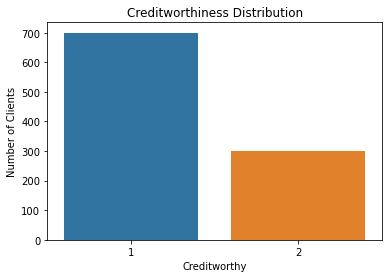

In [10]:
# Barplot of the creditworthiness

sns.countplot(df['Creditworthy'])
plt.xlabel('Creditworthy') 
plt.ylabel('Number of Clients');
plt.title('Creditworthiness Distribution')

In [11]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("This dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
df2 = df.copy()

/Users/damilareogunmola/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/damilareogunmola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/damilareogunmola/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


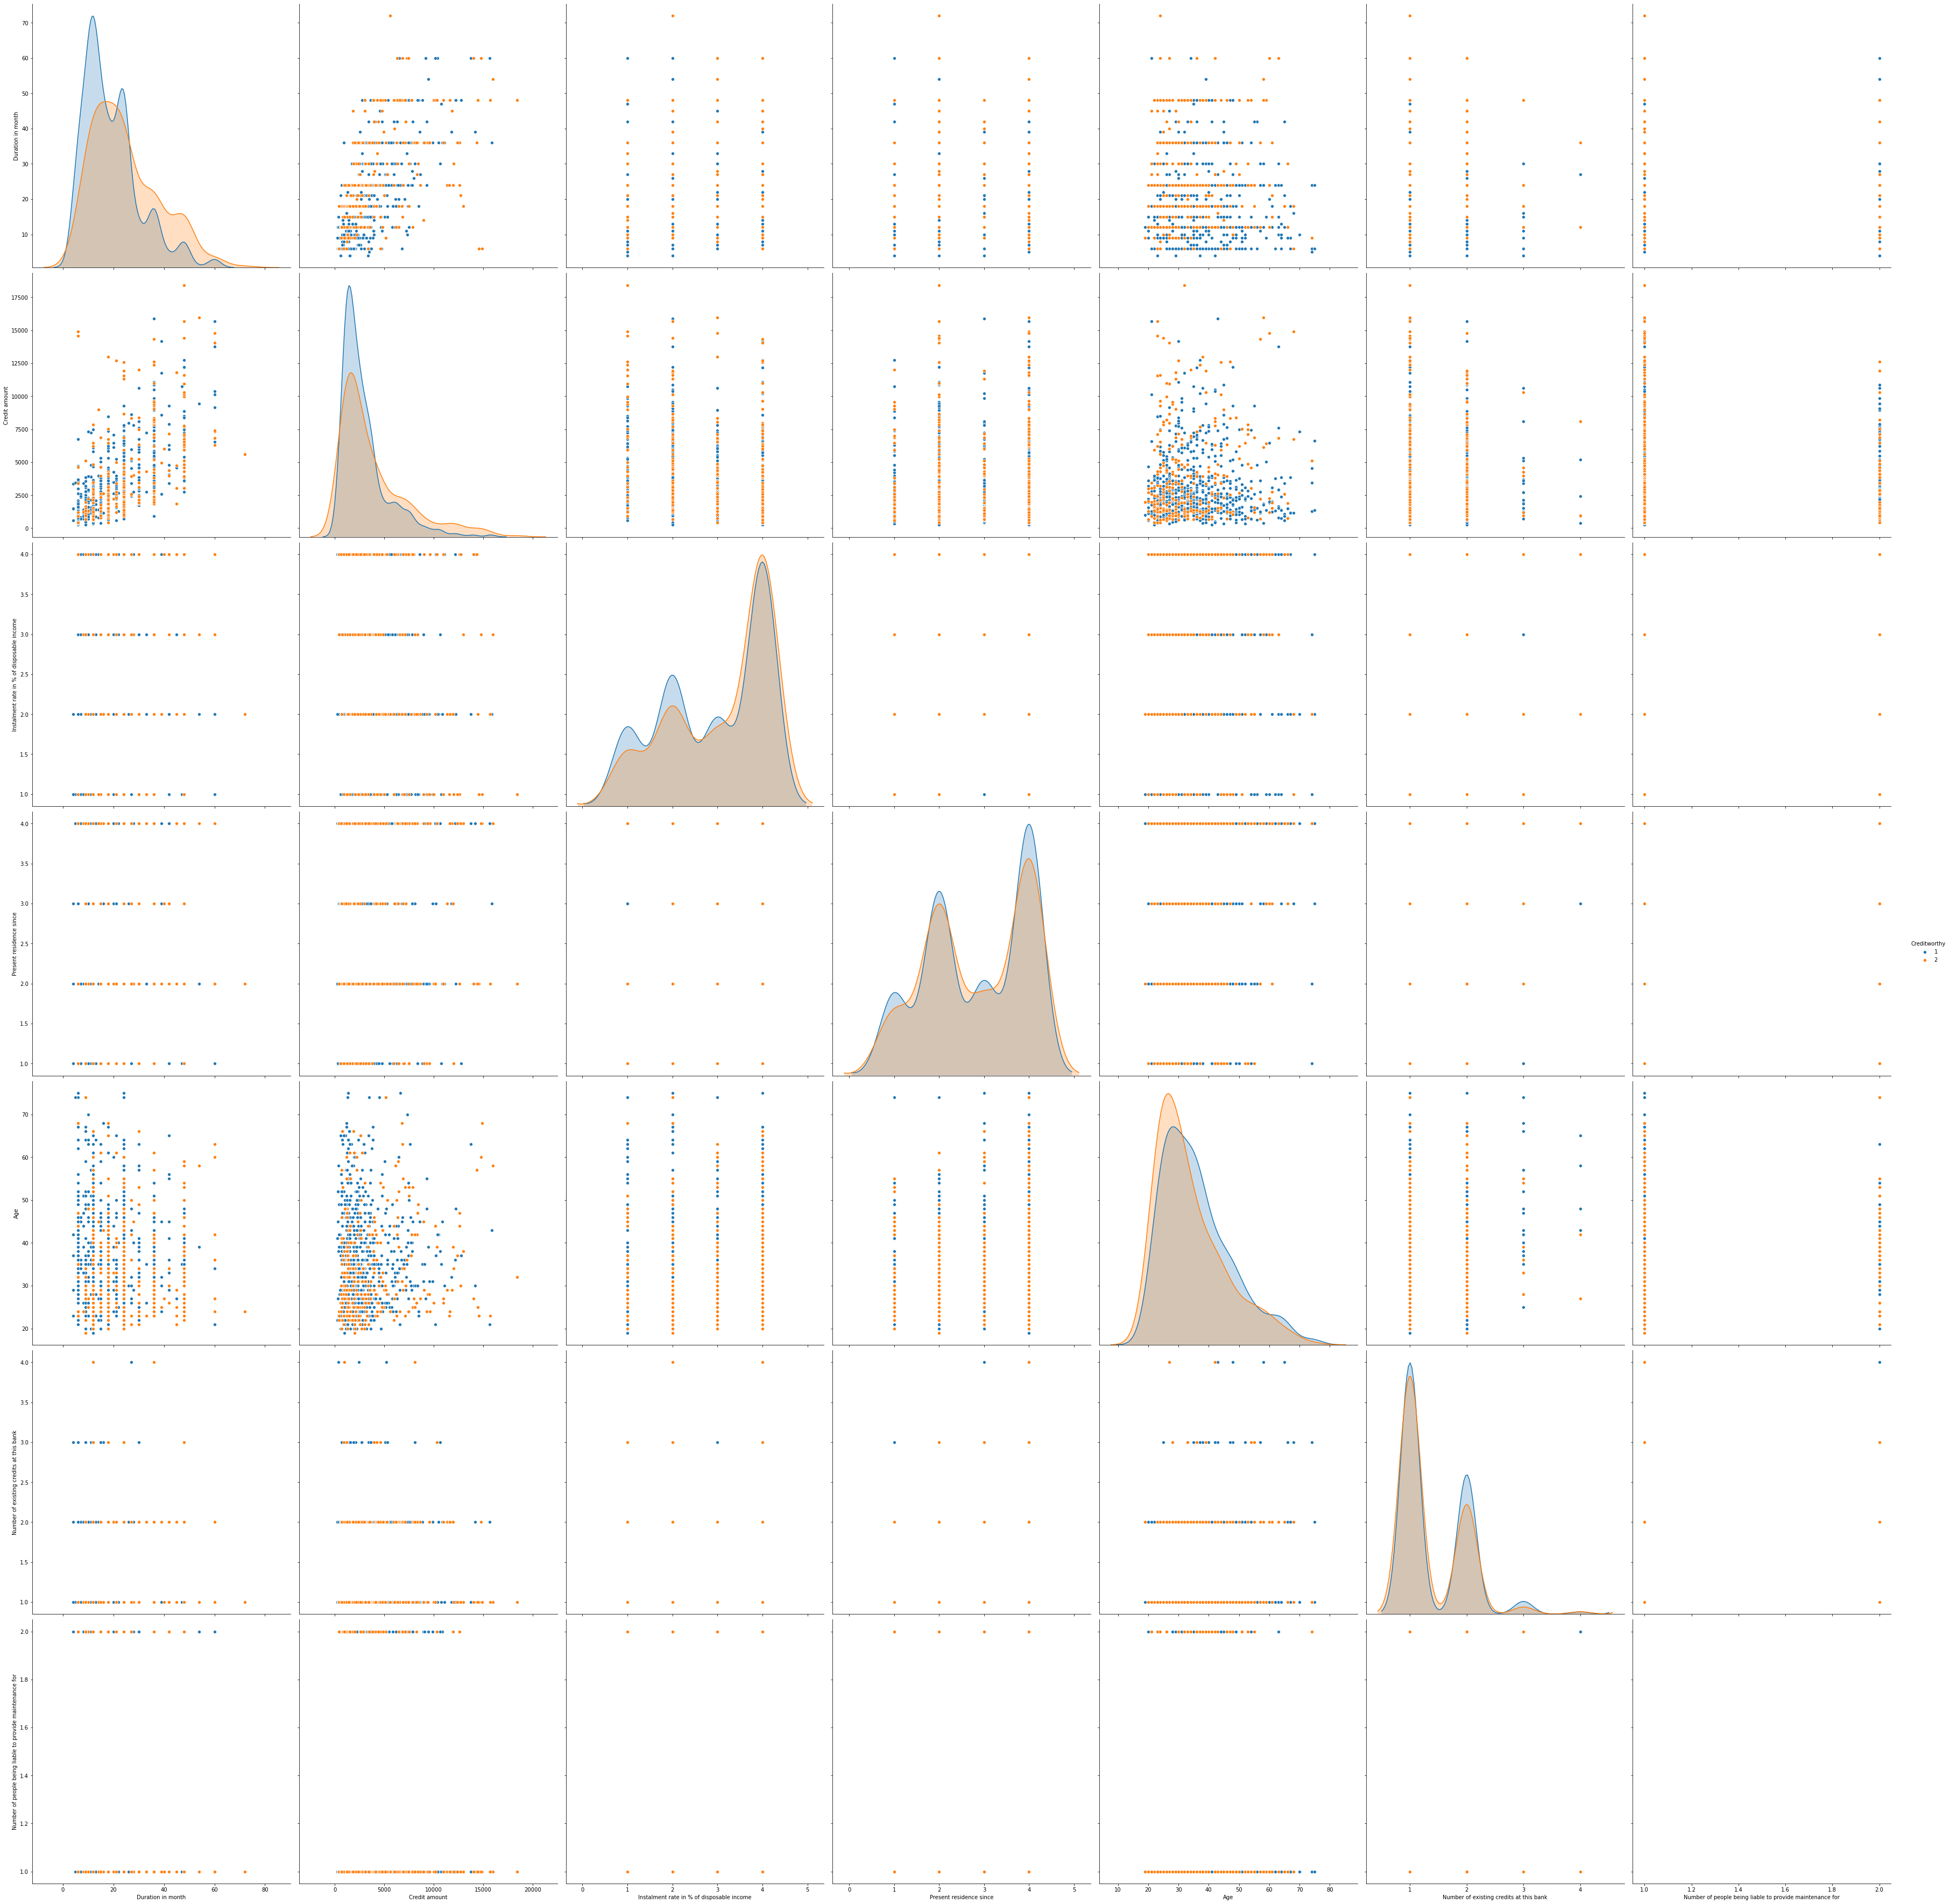

In [16]:
sns.pairplot(df2, hue='Creditworthy', size=7, height=3)
plt.savefig('pair.png')

In [17]:
# Apply One-Hot Encoding

onehot_df2 = pd.get_dummies(df2, dummy_na=True)
onehot_df2

In [18]:
onehot_df2.shape

(1000, 75)

Status of existing checking account_A14   -0.322436
Credit history_A34                        -0.181713
Housing_A152                              -0.134589
Savings account/bonds_A65                 -0.129238
Property_A121                             -0.119300
                                             ...   
Credit amount                              0.154739
Savings account/bonds_A61                  0.161007
Duration in month                          0.214927
Status of existing checking account_A11    0.258333
Creditworthy                               1.000000
Length: 66, dtype: float64


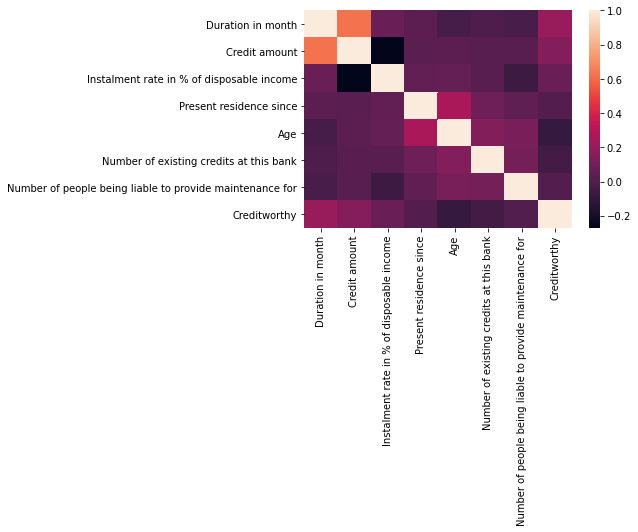

In [19]:
credit_corr = onehot_df2.corrwith(df2['Creditworthy']).sort_values()

# Print the correlations

print(credit_corr[credit_corr.notna()])

corr = df2.corr()
sns.heatmap(corr)

In [20]:
onehot_df2.head()

,Duration in month,Credit amount,Instalment rate in % of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Creditworthy,Status of existing checking account_A11,Status of existing checking account_A12,...,Job (incomplete)_A172,Job (incomplete)_A173,Job (incomplete)_A174,Job (incomplete)_nan,Telephone_A191,Telephone_A192,Telephone_nan,Foreign worker (incomplete)_A201,Foreign worker (incomplete)_A202,Foreign worker (incomplete)_nan
0,36,2299,4,4,39,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1,18,1239,4,4,61,1,1,1,0,1,...,0,0,0,1,1,0,0,1,0,0
2,24,947,4,3,38,1,2,2,0,0,...,0,0,0,1,1,0,0,0,0,1
3,15,1478,4,3,33,2,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,24,1525,4,3,34,1,2,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [21]:
missing_values_table(onehot_df2)

This dataframe has 75 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [22]:
# Separate df into the X and pop out 'Creditworthy' into y since it's the target we want to predict

X = onehot_df2.copy()

# Change the last column to boolean. Convert 1 - Creditworhty and 2 - Not creditworthy to True and False respectively

X["Creditworthy"] = np.where(X["Creditworthy"] == 1, True, False)
y = X.pop('Creditworthy')


The function _remove_collinear_features(X, threshold)_ below removes collinear features in a dataframe with a correlation coefficient greater than the threshold. Removing collinear features can help a model to generalize and improves the interpretability of the model. I found that it has very little effect on the accuracy of the models.
        

In [23]:
def remove_collinear_features(X, threshold):
    
    # Calculate the correlation matrix
    corr_matrix = X.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value

                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    X = X.drop(columns = drops)
    
               
    return X

In [24]:
# Remove the collinear features above a specified correlation coefficient
X = remove_collinear_features(X, 0.6);

In [25]:
X.shape

(1000, 69)

### Model Training

In [26]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 69)
(200, 69)
(800,)
(200,)


The **precision** is the ratio $ \frac{tp}{(tp + fp)} $  where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The **recall** is the ratio $ \frac{tp}{(tp + fn)} $ where tp is the number of true positives and fn the number of false negatives. The recall is the ability of the classifier to find all the positive samples.

The **F-beta score** can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The **support** is the number of occurrences of each class in y_test.

From [scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures)

In [45]:

# Will compare five different machine learning Cassification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Random Forest Classification
# 5 - XGBoost 

# Function to calculate KFold Cross Validation

def cross_val(X, y, model):
    # Applying k-Fold Cross Validation
    
    from sklearn.model_selection import cross_val_score
    
    accuracies = cross_val_score(estimator = model, X = X, y = y)
    
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve
    
    # Train the model
    clf = model.fit(X_train, y_train)
    
    
    # Make predictions and evalute
    y_pred = model.predict(X_test)
    model_cross = cross_val(X, y, model)
    
    # Print the precision, recall, F-measure and support
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    plot_confusion_matrix(clf, X_test, y_test)
    
    # Plot ROC curve
   
    fig, ax = plt.subplots()
    
    plot_roc_curve(clf, X_test, y_test, ax=ax)
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=1)
    
    
    
    # Return the performance metric
    return model_cross

### Logistic Regression
Logisitc Regression is a very simple and straightforward linear model. It uses the same equation as linear regression i.e $f_{\theta}(x) = x^T\theta * \theta_{0} $ except that it uses an activation fucntion usually a sigmoid to reduce the values into two classes - either 0 or 1.

$$ f_{\theta}(x) = x^{T}\theta + \theta_{0}  $$
$$ H(X) = \sigma(f_{\theta}(x)) = \frac{1}{1 + \exp^{-(x^{T}\theta + \theta_{0})}} $$

![Logistic Sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)


              precision    recall  f1-score   support

       False       0.65      0.45      0.53        62
        True       0.78      0.89      0.83       138

    accuracy                           0.76       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.74      0.76      0.74       200

Logistic Regression Performance on the test set: Cross Validation Score = 0.7500


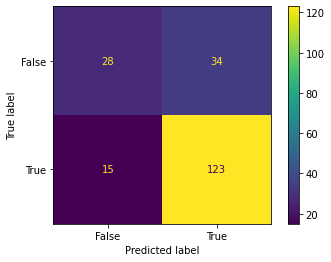

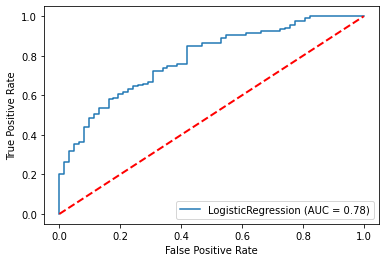

In [46]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0, max_iter=4000, )
log_cross = fit_and_evaluate(log)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % log_cross)

### K-Nearest Neighbours Classifier

![Image displaying nearest neighbours classification Source:DataCamp](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png)

KNN is a simple algorithm that uses the nearest neighbours to classify our input.


              precision    recall  f1-score   support

       False       0.48      0.21      0.29        62
        True       0.72      0.90      0.80       138

    accuracy                           0.69       200
   macro avg       0.60      0.55      0.54       200
weighted avg       0.64      0.69      0.64       200

K Nearest Neighbours Performance on the test set: Cross Validation Score = 0.6700


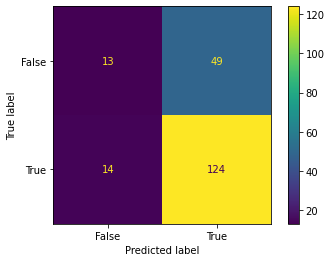

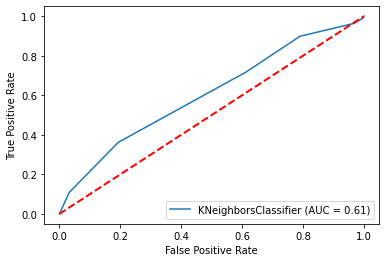

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(7)
knn_cross = fit_and_evaluate(knn)

print('K Nearest Neighbours Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

### Support Vector Machines (SVM)

![Source:DataCamp](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288454/index2_ub1uzd.png)

The SVM searches for the optimal hyperplane that separates data in the best way. While several problems cannot be solved with simply a liner hyperplane, the SVM uses a kernel trick to transform the data to a higher dimensional plane. 

In the image below, the data points on the left are transformed to the z-plane on the right simply using $ z = x^2 + y^2 $

![Source:DataCamp](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index_bnr4rx.png)

              precision    recall  f1-score   support

       False       0.75      0.05      0.09        62
        True       0.70      0.99      0.82       138

    accuracy                           0.70       200
   macro avg       0.72      0.52      0.46       200
weighted avg       0.71      0.70      0.59       200

Support Vector Classifier Performance on the test set: Cross Validation Score = 0.7100


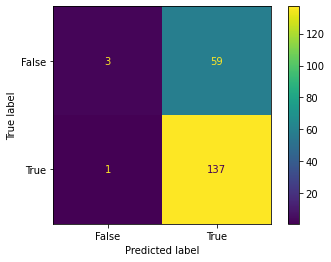

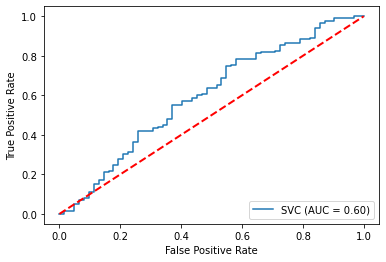

In [48]:
from sklearn.svm import SVC

svc = SVC()
svc_cross = fit_and_evaluate(svc)

print('Support Vector Classifier Performance on the test set: Cross Validation Score = %0.4f' % svc_cross)

### Random Forests

A random forest is a meta-estimator that fits a number of decision tree classifiers on various randomly picked sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

              precision    recall  f1-score   support

       False       0.63      0.47      0.54        62
        True       0.79      0.88      0.83       138

    accuracy                           0.75       200
   macro avg       0.71      0.67      0.68       200
weighted avg       0.74      0.75      0.74       200

Random Forest Performance on the test set: Cross Validation Score = 0.7340


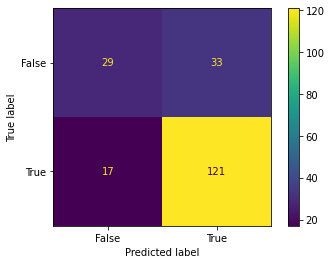

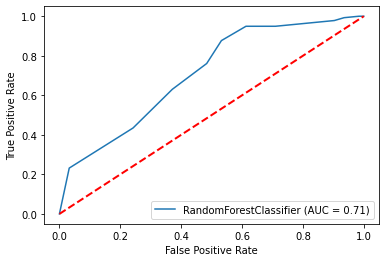

In [49]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

### XGBoost

XGBoost stands for eXtreme Gradient Boosting. It is an implementation of gradient boosting machines that is focused on computational speed and model performance. 

Gradient Boosting uses decision trees as a weak learner to make predictions, a loss function (XGBoost uses a log-loss) and a an additive model to add weak learners, minimizing the loss. 

![Source: Zhang et al.](https://www.researchgate.net/profile/Maria_Peraita-Adrados/publication/326379229/figure/fig5/AS:647978477948928@1531501516288/A-simple-example-of-visualizing-gradient-boosting.png)

              precision    recall  f1-score   support

       False       0.57      0.44      0.50        62
        True       0.77      0.86      0.81       138

    accuracy                           0.73       200
   macro avg       0.67      0.65      0.65       200
weighted avg       0.71      0.72      0.71       200

Gradient Boosting Classification Performance on the test set: Cross Validation Score = 0.7560


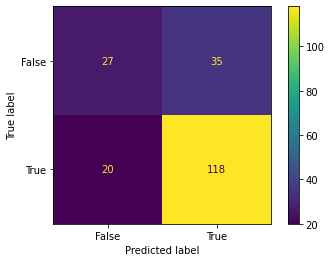

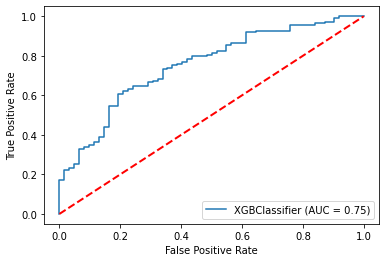

In [50]:
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradient Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)